# What's the data like?

In [48]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import os, dotenv
project_path = os.path.dirname(dotenv.find_dotenv())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
"""
load data
"""

df = pd.read_csv(project_path + '/data/raw/data.csv', index_col=0)
df.head()

,index,volumefrom,open,high,close,low,volumeto,time
0,0,5308.04,6916.03,7032.79,7025.50,6890.13,3.709711e+07,1522486800
1,1,16533.51,7023.16,7198.68,7110.38,6984.43,1.176889e+08,1522490400
2,2,6133.92,7110.38,7144.87,7104.39,7062.55,4.372014e+07,1522494000
3,3,16748.27,7104.42,7228.40,7198.18,7067.62,1.199642e+08,1522497600
4,4,4564.56,7198.29,7198.80,7053.37,7051.17,3.259900e+07,1522501200


In [4]:
"""
descriptive stats
"""
df.describe()

,index,volumefrom,open,high,close,low,volumeto,time
count,46023.000000,4.602300e+04,46023.000000,46023.000000,46023.000000,46023.000000,4.602300e+04,4.602300e+04
mean,1000.000000,3.225572e+03,1886.373203,1904.522454,1886.442461,1868.437188,8.656790e+06,1.446887e+09
std,577.645148,5.961332e+04,3272.862938,3299.083569,3273.005449,3244.198294,2.892422e+07,4.780517e+07
min,0.000000,0.000000e+00,50.350000,50.350000,48.250000,5.760000,0.000000e+00,1.364087e+09
25%,500.000000,1.825400e+02,276.280000,277.985000,276.310000,274.730000,9.559342e+04,1.405489e+09
50%,1000.000000,1.404710e+03,538.050000,544.220000,537.990000,532.320000,5.936102e+05,1.446887e+09
75%,1500.000000,3.029195e+03,1085.780000,1142.850000,1088.510000,1056.000000,3.272736e+06,1.488285e+09
max,2000.000000,8.410600e+06,19784.930000,19870.620000,19784.930000,19691.740000,2.305670e+09,1.529687e+09


In [47]:
"""
Check shape and confirm that no NA values are present
"""
df.dropna().shape == df.shape, df.shape

(True, (46023, 8))

In [6]:
"""
Number of unique timepoints
"""
df.time.unique().shape

(46001,)

In [27]:
"""
Take a small sample for plotting
"""
sample = df.sample(n=1000, replace=False)

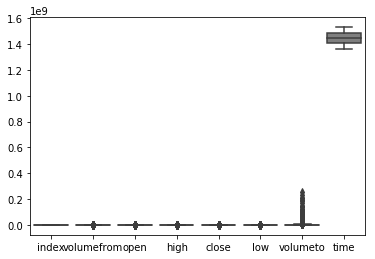

In [28]:
"""
Check relative distribution of data features
"""
sns.boxplot(data=sample)

"\nNote: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.\n"

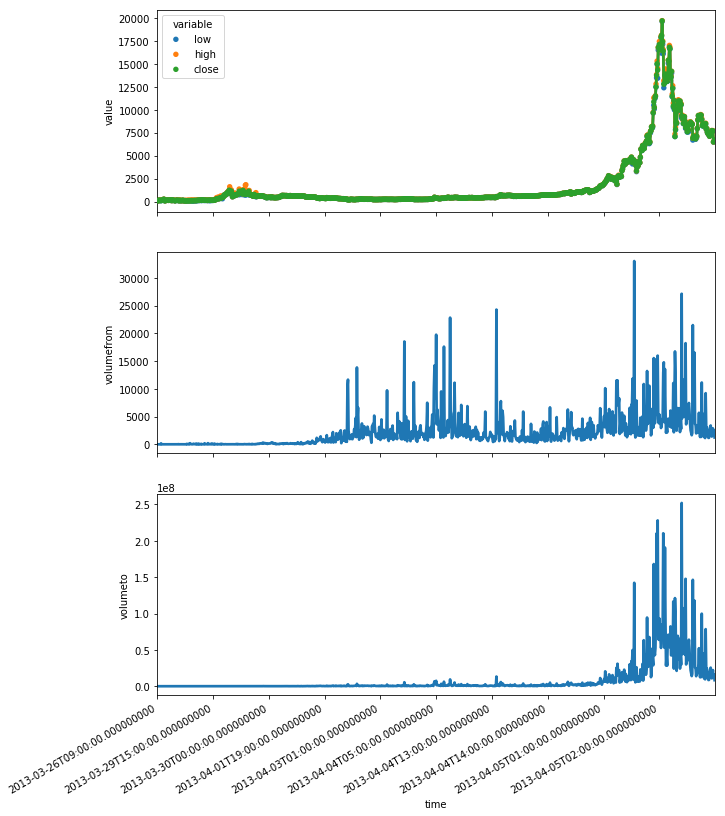

In [50]:
"""
Plot data features against time. Making sure that the data set was created correctly / sanity check.
"""

pltdata = sample.copy()
pltdata.time = pd.to_datetime(pltdata.time, unit='s')


fig, ax = plt.subplots(3, sharex=True)
fig.set_size_inches((10,14))
for a in ax:
    a.xaxis_date()

pricedata = pd.melt(sample, id_vars='time', value_vars=['low', 'high', 'close'])
sns.pointplot(ax=ax[0], data=pricedata, x='time', y='value', hue='variable', linestyles='-', markers='.')
sns.pointplot(ax=ax[1], data=pltdata, x='time', y='volumefrom', linestyles='-', markers='')
sns.pointplot(ax=ax[2], data=pltdata, x='time', y='volumeto', linestyles='-', markers='')
locs, labels = plt.xticks()
plt.xticks([locs[x*100] for x in range(int(len(locs) / 100))])
fig.autofmt_xdate()

"""
Note: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.
Also current/past price makes sense on this chart.
""" 

In [45]:
"""
Dates go until 2018 and are mostly unique.
"""
pd.to_datetime(df.time.unique(), unit='s')

DatetimeIndex(['2018-03-31 09:00:00', '2018-03-31 10:00:00',
               '2018-03-31 11:00:00', '2018-03-31 12:00:00',
               '2018-03-31 13:00:00', '2018-03-31 14:00:00',
               '2018-03-31 15:00:00', '2018-03-31 16:00:00',
               '2018-03-31 17:00:00', '2018-03-31 18:00:00',
               ...
               '2013-06-14 23:00:00', '2013-06-15 00:00:00',
               '2013-06-15 01:00:00', '2013-06-15 02:00:00',
               '2013-06-15 03:00:00', '2013-06-15 04:00:00',
               '2013-06-15 05:00:00', '2013-06-15 06:00:00',
               '2013-06-15 07:00:00', '2013-06-15 08:00:00'],
              dtype='datetime64[ns]', length=46001, freq=None)